In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prediccion-de-sufrir-enfermedades-coronarias/test_public.csv
/kaggle/input/prediccion-de-sufrir-enfermedades-coronarias/test_private.csv
/kaggle/input/prediccion-de-sufrir-enfermedades-coronarias/train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("/kaggle/input/prediccion-de-sufrir-enfermedades-coronarias/train.csv")  


**Análisis exploratorio de datos**

In [3]:
df.columns

Index(['CHD_OR_MI', 'SEX', 'AGE', 'HEALTH', 'PHYSICAL_HEALTH', 'MENTAL_HEALTH',
       'PHYSICAL_ACTIVITIES', 'BLOOD_PRESSURE', 'HIGH_CHOLESTEROL',
       'SKIN_CANCER', 'CANCER', 'BRONCHITIS', 'DEPRESSIVE_DISORDER',
       'KIDNEY_DISEASE', 'DIABETES', 'ARTHRITIS', 'BMI', 'DIFFICULTY_WALKING',
       'SMOKE', 'TABACCO_PRODUCTS', 'E_CIGARETTES', 'HEAVY_DRINKERS', 'HIV',
       'FRUITS', 'VEGETABLES', 'FRIED_POTATOES', 'ETHNICITY', 'ID'],
      dtype='object')

In [4]:
print(df.head())


   CHD_OR_MI  SEX  AGE  HEALTH  PHYSICAL_HEALTH  MENTAL_HEALTH  \
0        1.0    1   34     1.0              1.0            2.0   
1        0.0    1   76     1.0              1.0            1.0   
2        1.0    2   69     1.0              1.0            1.0   
3        1.0    2   36     1.0              1.0            1.0   
4        1.0    2   21     1.0              1.0            2.0   

   PHYSICAL_ACTIVITIES  BLOOD_PRESSURE  HIGH_CHOLESTEROL  SKIN_CANCER  ...  \
0                  1.0             1.0               2.0          2.0  ...   
1                  2.0             2.0               1.0          1.0  ...   
2                  2.0             2.0               2.0          2.0  ...   
3                  1.0             1.0               2.0          2.0  ...   
4                  1.0             1.0               1.0          2.0  ...   

   SMOKE  TABACCO_PRODUCTS  E_CIGARETTES  HEAVY_DRINKERS  HIV  FRUITS  \
0    2.0               3.0           3.0             1.0  2.0

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347246 entries, 0 to 347245
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CHD_OR_MI            347246 non-null  float64
 1   SEX                  347246 non-null  int64  
 2   AGE                  347246 non-null  int64  
 3   HEALTH               346408 non-null  float64
 4   PHYSICAL_HEALTH      339940 non-null  float64
 5   MENTAL_HEALTH        341212 non-null  float64
 6   PHYSICAL_ACTIVITIES  346593 non-null  float64
 7   BLOOD_PRESSURE       345939 non-null  float64
 8   HIGH_CHOLESTEROL     297055 non-null  float64
 9   SKIN_CANCER          346379 non-null  float64
 10  CANCER               346454 non-null  float64
 11  BRONCHITIS           345933 non-null  float64
 12  DEPRESSIVE_DISORDER  345560 non-null  float64
 13  KIDNEY_DISEASE       346115 non-null  float64
 14  DIABETES             346716 non-null  float64
 15  ARTHRITIS        

In [6]:
print(df.describe())

           CHD_OR_MI            SEX            AGE         HEALTH  \
count  347246.000000  347246.000000  347246.000000  346408.000000   
mean        0.918623       1.535557      54.607679       1.164214   
std         0.273414       0.498735      17.557646       0.370470   
min         0.000000       1.000000      18.000000       1.000000   
25%         1.000000       1.000000      40.000000       1.000000   
50%         1.000000       2.000000      57.000000       1.000000   
75%         1.000000       2.000000      69.000000       1.000000   
max         1.000000       2.000000      80.000000       2.000000   

       PHYSICAL_HEALTH  MENTAL_HEALTH  PHYSICAL_ACTIVITIES  BLOOD_PRESSURE  \
count    339940.000000  341212.000000        346593.000000   345939.000000   
mean          1.445773       1.498608             1.242922        1.392037   
std           0.694048       0.711196             0.428849        0.488206   
min           1.000000       1.000000             1.000000        

In [7]:
df["BMI"].describe()

count    310286.000000
mean       2855.145811
std         652.370720
min        1200.000000
25%        2414.000000
50%        2744.000000
75%        3175.000000
max        9933.000000
Name: BMI, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

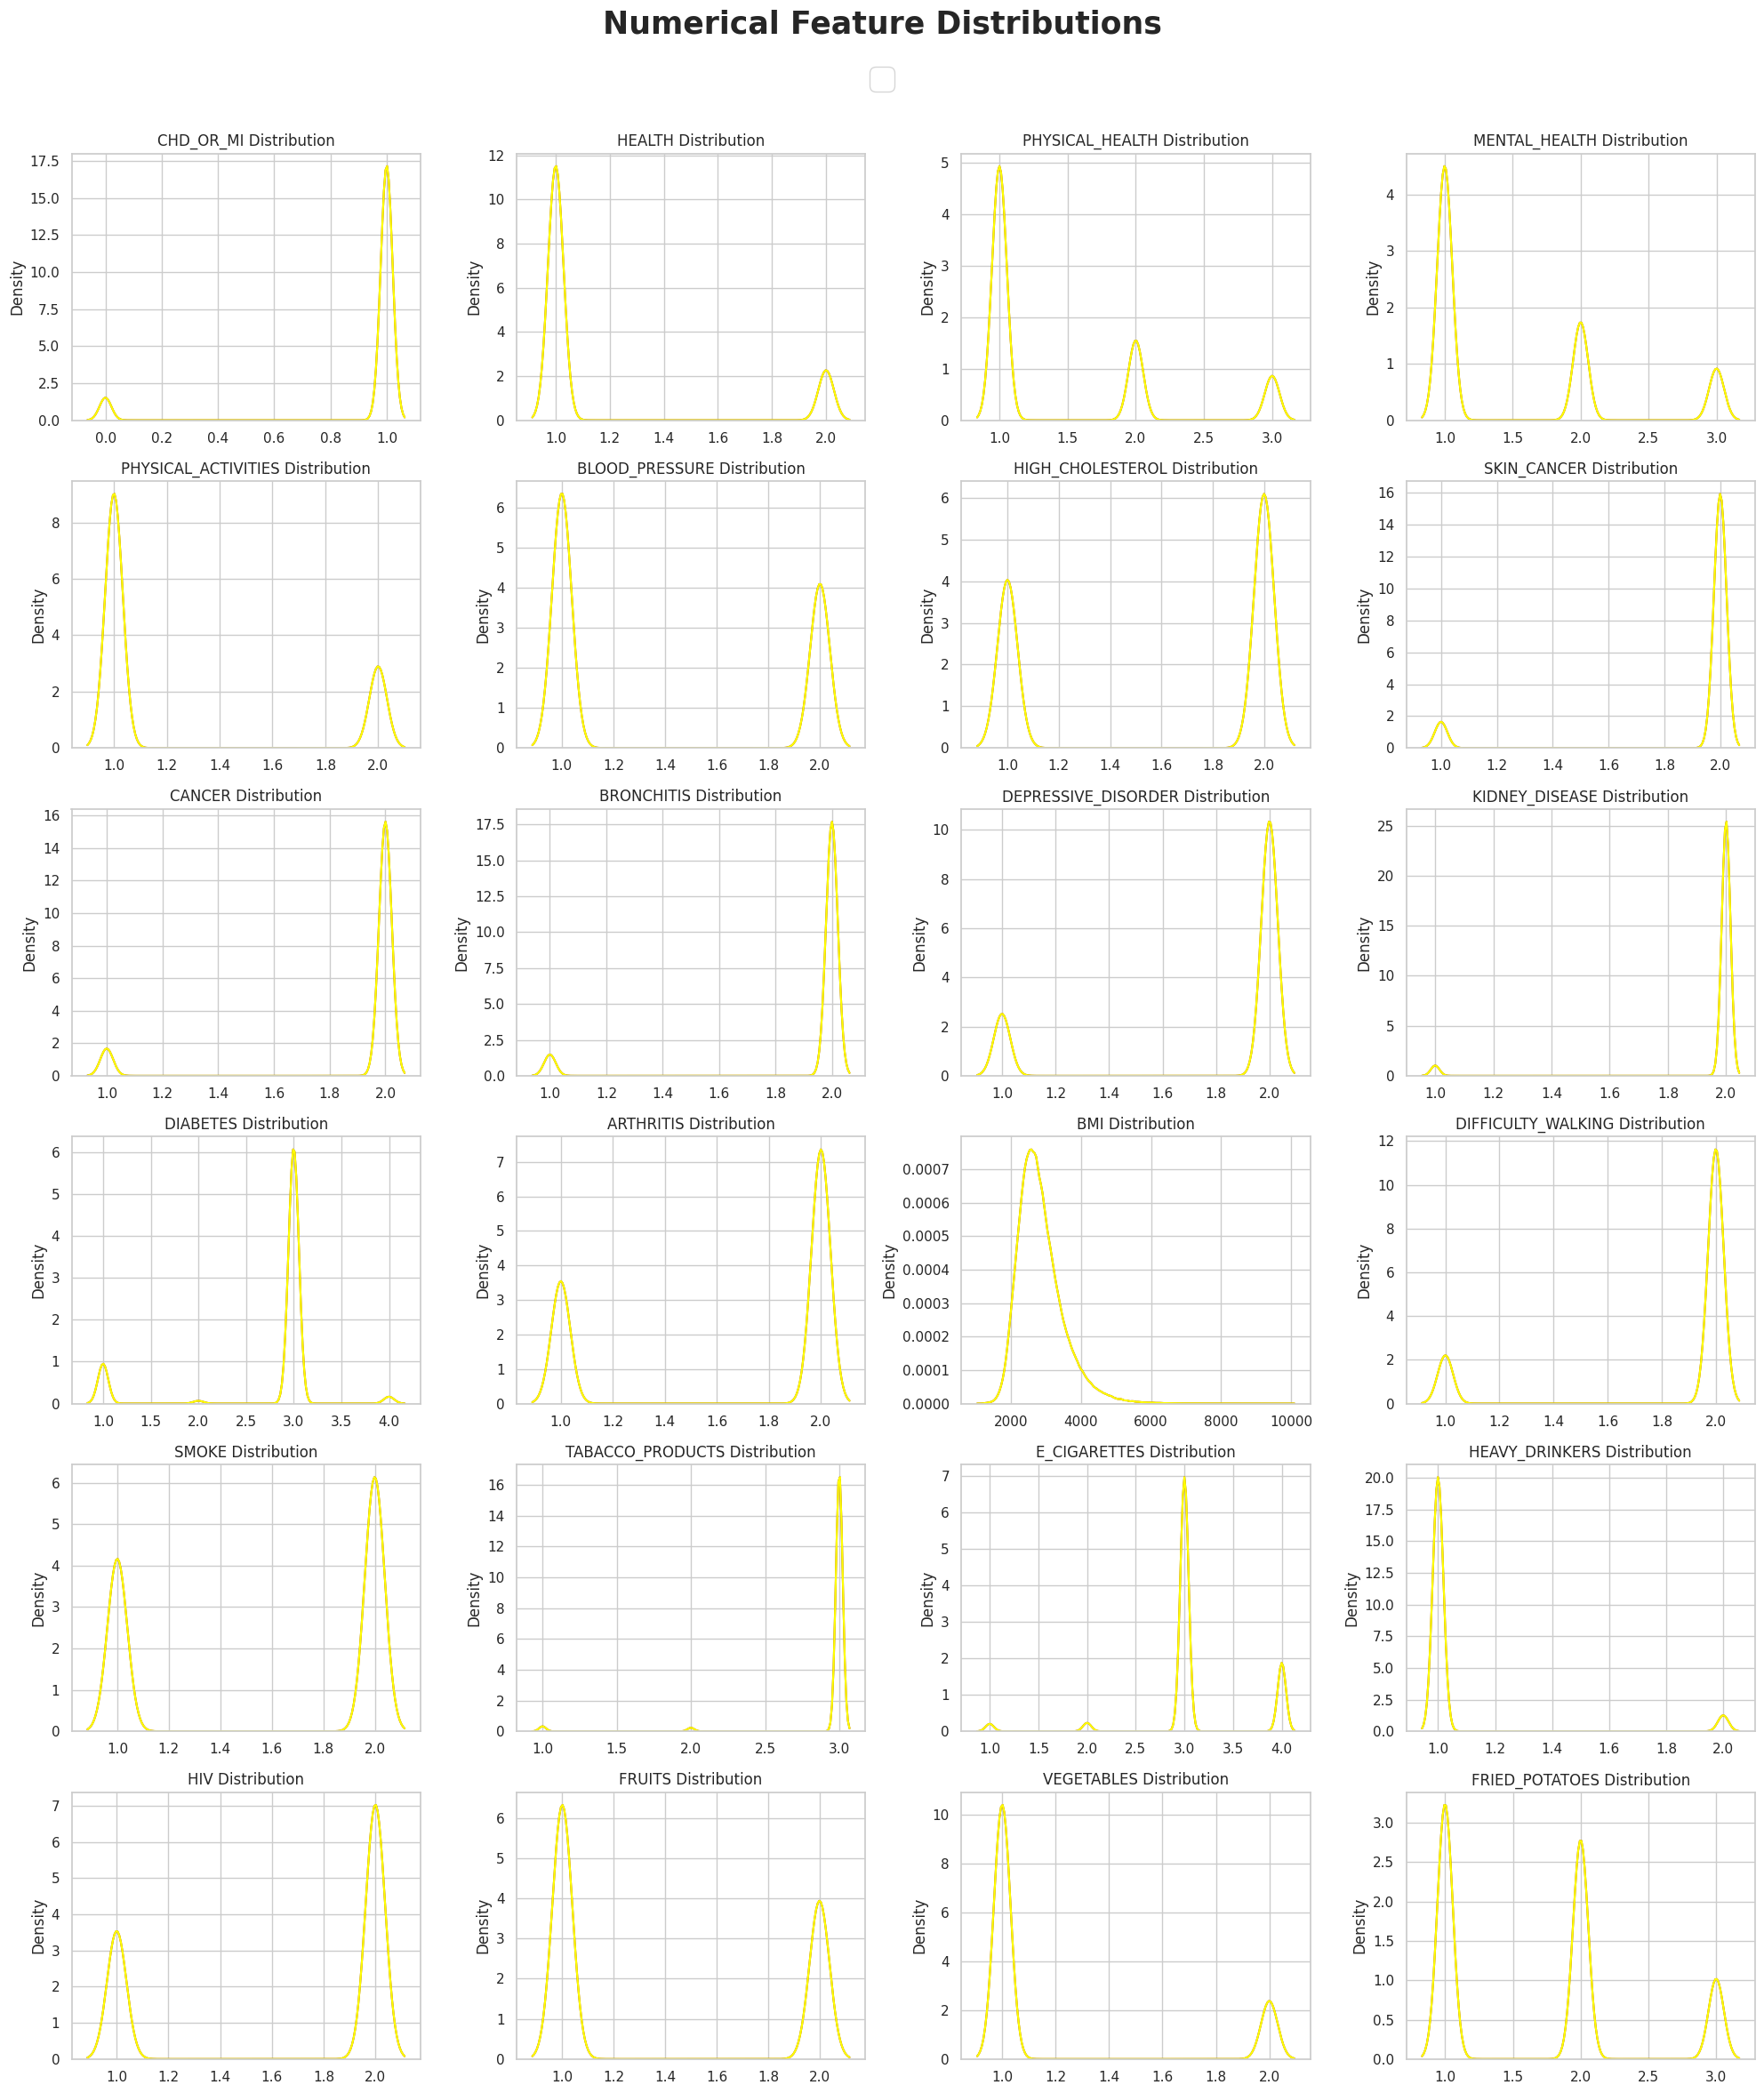

In [8]:
import math

num_cols = df.select_dtypes(include=['float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
all_features = num_cols + cat_cols


features = num_cols
n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

columns = features
n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    sns.kdeplot(
        df[column],
        ax=ax[i], color='#9E3F00'
    )
    
    sns.kdeplot(
        df[column],
        ax=ax[i], color='yellow'
    )
    
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
    
fig.suptitle(f'Numerical Feature Distributions\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=25, ncol=3)
plt.tight_layout()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

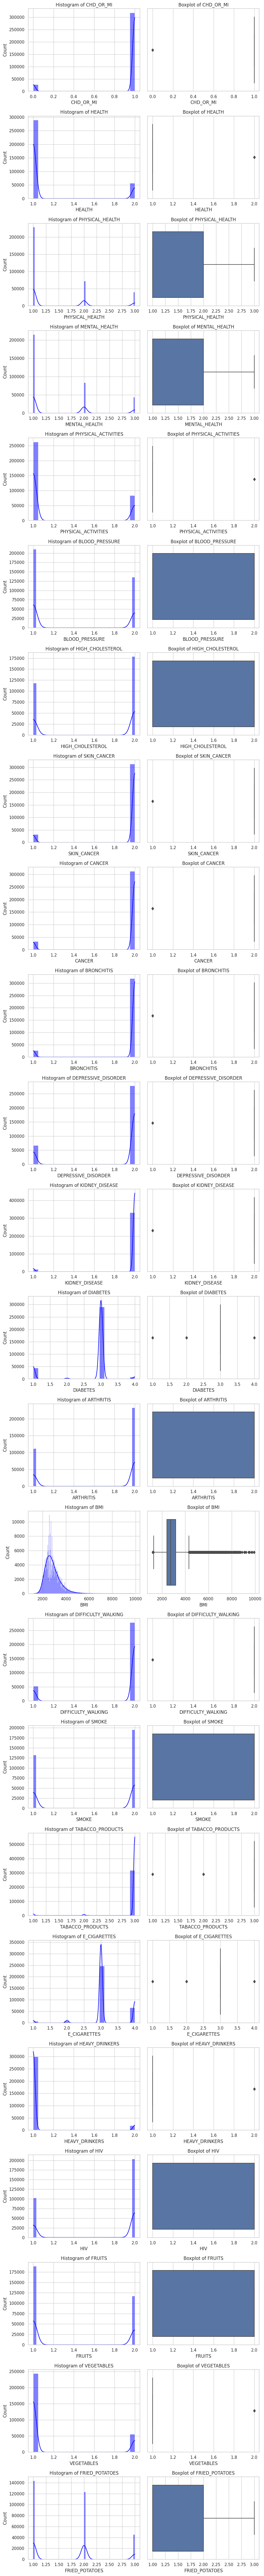

In [9]:
num_cols_count = len(num_cols)
n_rows = num_cols_count

fig, axs = plt.subplots(n_rows, 2, figsize=(10, n_rows*4))

for idx, col in enumerate(num_cols):

    # Plot histogram
    sns.histplot(data=df, x=col, kde=True, ax=axs[idx, 0], color='blue')
    axs[idx, 0].set_title(f'Histogram of {col}')

    # Plot boxplot
    sns.boxplot(data=df, x=col, ax=axs[idx, 1])
    axs[idx, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

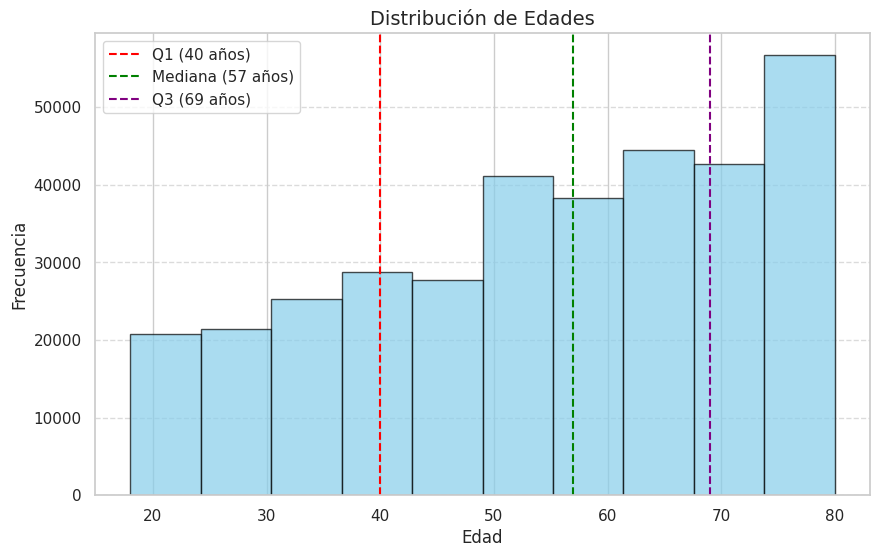

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama 'df' y contiene la columna 'AGE'
# Reemplaza 'df' por el nombre real de tu DataFrame
age_data = df['AGE'].dropna()  # Eliminamos valores NaN en caso existan

# Calcular los cuartiles
q1 = age_data.quantile(0.25)
median = age_data.median()
q3 = age_data.quantile(0.75)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=10, edgecolor='black', color='skyblue', alpha=0.7)

# Añadir líneas de los cuartiles
plt.axvline(q1, color='red', linestyle='--', linewidth=1.5, label=f'Q1 ({int(q1)} años)')
plt.axvline(median, color='green', linestyle='--', linewidth=1.5, label=f'Mediana ({int(median)} años)')
plt.axvline(q3, color='purple', linestyle='--', linewidth=1.5, label=f'Q3 ({int(q3)} años)')

# Añadir etiquetas y título
plt.title('Distribución de Edades', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


In [11]:
# Calcular Q1 y Q3
q1 = df['AGE'].quantile(0.25)
q3 = df['AGE'].quantile(0.75)

# Filtrar datos entre Q1 y Q3
data_in_iqr = df[(df['AGE'] >= q1) & (df['AGE'] <= q3)]

# Proporción de datos en el rango intercuartílico
proporcion = len(data_in_iqr) / len(df['AGE'].dropna()) * 100

print(f"El {proporcion:.2f}% de los datos está entre Q1 y Q3.")


El 52.18% de los datos está entre Q1 y Q3.


In [12]:
print(df.nunique())

CHD_OR_MI                   2
SEX                         2
AGE                        63
HEALTH                      2
PHYSICAL_HEALTH             3
MENTAL_HEALTH               3
PHYSICAL_ACTIVITIES         2
BLOOD_PRESSURE              2
HIGH_CHOLESTEROL            2
SKIN_CANCER                 2
CANCER                      2
BRONCHITIS                  2
DEPRESSIVE_DISORDER         2
KIDNEY_DISEASE              2
DIABETES                    4
ARTHRITIS                   2
BMI                      3702
DIFFICULTY_WALKING          2
SMOKE                       2
TABACCO_PRODUCTS            3
E_CIGARETTES                4
HEAVY_DRINKERS              2
HIV                         2
FRUITS                      2
VEGETABLES                  2
FRIED_POTATOES              3
ETHNICITY                   6
ID                     347246
dtype: int64


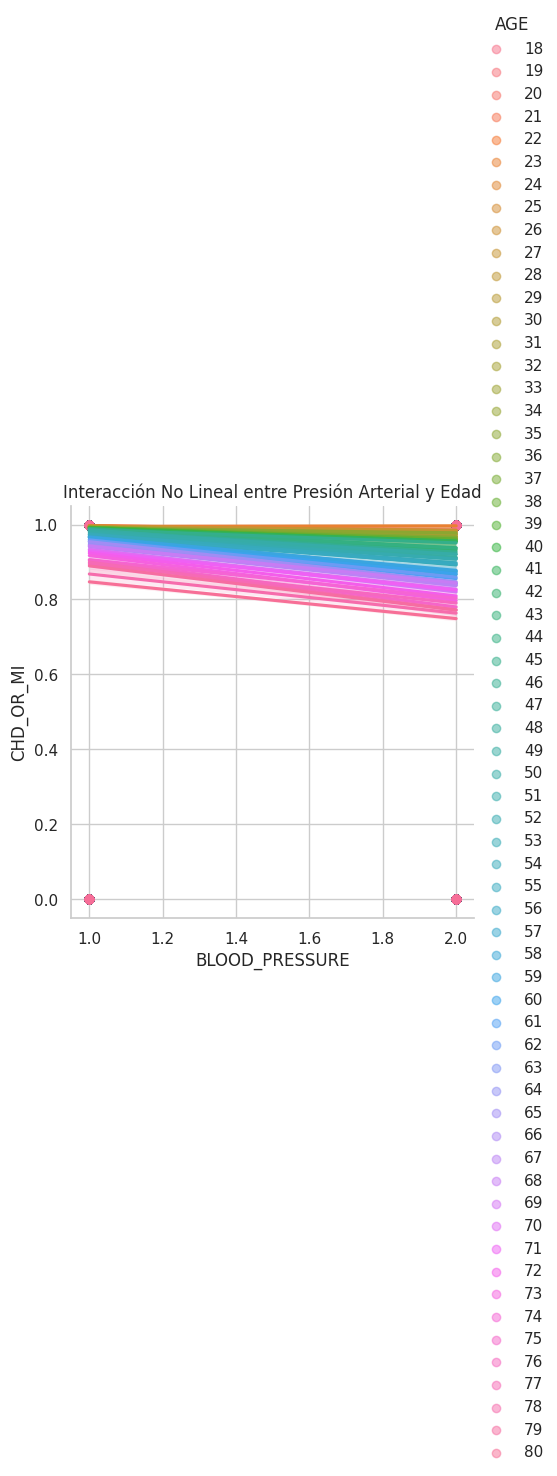

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo X es tu DataFrame con AGE y BLOOD_PRESSURE
sns.lmplot(data=df, x="BLOOD_PRESSURE", y="CHD_OR_MI", hue="AGE", scatter_kws={"alpha": 0.5})
plt.title("Interacción No Lineal entre Presión Arterial y Edad")
plt.show()

Donde cada linea corresponde a cierta edad dependiendo del color

In [14]:
counts = df['CHD_OR_MI'].value_counts()
print(counts)
print(f"{counts[1]} valores positivos")
print(f"{counts[1]/len(df)}")


CHD_OR_MI
1.0    318988
0.0     28258
Name: count, dtype: int64
318988 valores positivos
0.9186225327289588


Distribución de CHD_OR_MI:
CHD_OR_MI
1.0    91.862253
0.0     8.137747
Name: proportion, dtype: float64


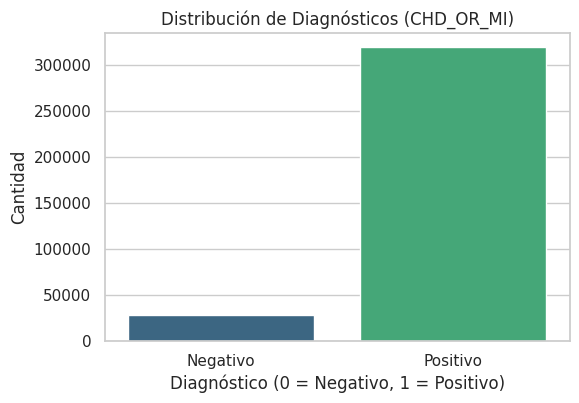

Estadísticas descriptivas de la clase positiva:
       CHD_OR_MI            SEX            AGE         HEALTH  \
count   318988.0  318988.000000  318988.000000  318272.000000   
mean         1.0       1.546111      53.430201       1.140022   
std          0.0       0.497870      17.510443       0.347010   
min          1.0       1.000000      18.000000       1.000000   
25%          1.0       1.000000      39.000000       1.000000   
50%          1.0       2.000000      55.000000       1.000000   
75%          1.0       2.000000      68.000000       1.000000   
max          1.0       2.000000      80.000000       2.000000   

       PHYSICAL_HEALTH  MENTAL_HEALTH  PHYSICAL_ACTIVITIES  BLOOD_PRESSURE  \
count    312737.000000  313659.000000        318436.000000   317789.000000   
mean          1.414470       1.497056             1.230769        1.361095   
std           0.668823       0.706766             0.421325        0.480319   
min           1.000000       1.000000             1.00

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

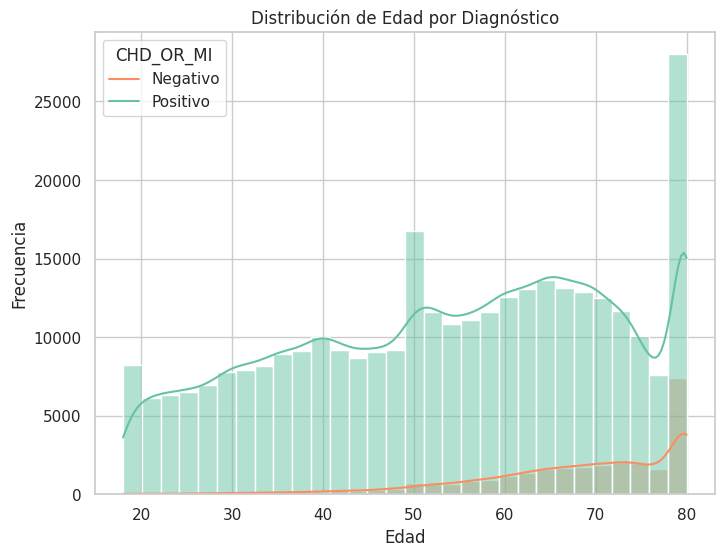

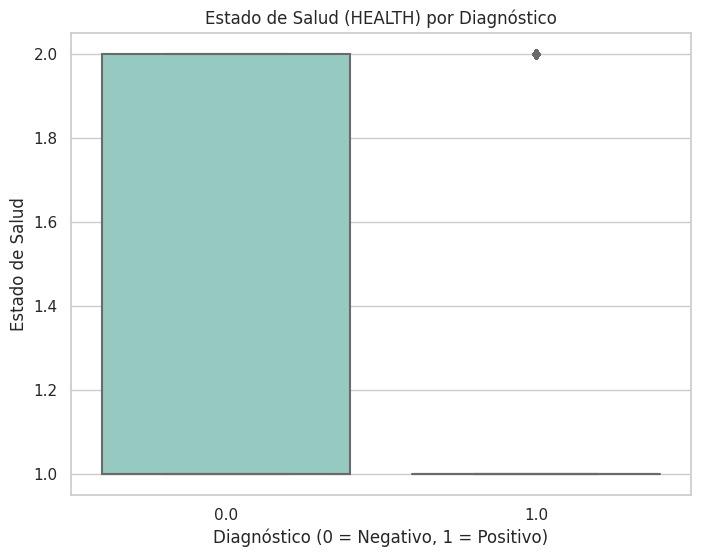

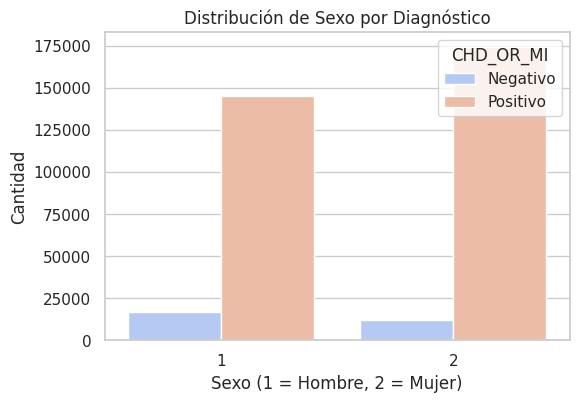

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que `df` es tu dataframe
# Resumen de la variable objetivo
print("Distribución de CHD_OR_MI:")
print(df['CHD_OR_MI'].value_counts(normalize=True) * 100)

# Gráfico de barras para mostrar la proporción de positivos y negativos
plt.figure(figsize=(6, 4))
sns.countplot(x='CHD_OR_MI', data=df, palette='viridis')
plt.title("Distribución de Diagnósticos (CHD_OR_MI)")
plt.xlabel("Diagnóstico (0 = Negativo, 1 = Positivo)")
plt.ylabel("Cantidad")
plt.xticks(ticks=[0, 1], labels=["Negativo", "Positivo"])
plt.show()

# Comparación de estadísticas descriptivas para positivos y negativos
positivos = df[df['CHD_OR_MI'] == 1]
negativos = df[df['CHD_OR_MI'] == 0]

print("Estadísticas descriptivas de la clase positiva:")
print(positivos.describe())

print("\nEstadísticas descriptivas de la clase negativa:")
print(negativos.describe())

# Comparación de edad entre positivos y negativos
df['CHD_OR_MI_Label'] = df['CHD_OR_MI'].map({0: 'Negativo', 1: 'Positivo'})

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='AGE', hue='CHD_OR_MI_Label', kde=True, palette='Set2', bins=30)
plt.title("Distribución de Edad por Diagnóstico")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend(title="CHD_OR_MI",labels=["Negativo", "Positivo"])
plt.show()


# Comparación de otra variable (ejemplo: HEALTH)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='CHD_OR_MI', y='HEALTH', palette='Set3')
plt.title("Estado de Salud (HEALTH) por Diagnóstico")
plt.xlabel("Diagnóstico (0 = Negativo, 1 = Positivo)")
plt.ylabel("Estado de Salud")
plt.show()

# Análisis adicional: Sexo
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SEX', hue='CHD_OR_MI', palette='coolwarm')
plt.title("Distribución de Sexo por Diagnóstico")
plt.xlabel("Sexo (1 = Hombre, 2 = Mujer)")
plt.ylabel("Cantidad")
plt.legend(title="CHD_OR_MI", labels=["Negativo", "Positivo"])
plt.show()


Se puede observar que la curva desciende entre los 70 y 80 años, al parecer la cantidad de registro disminuye

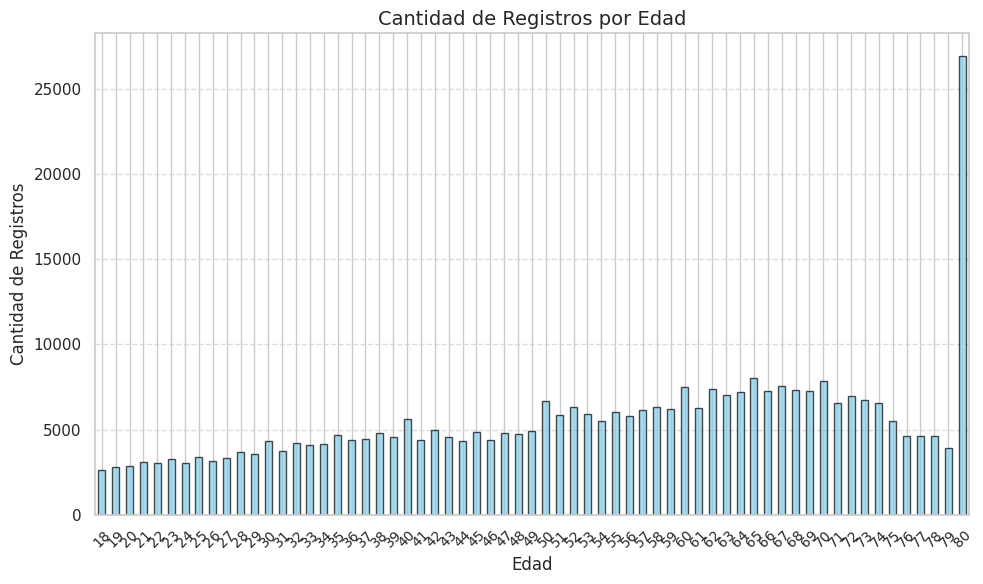

In [16]:
import matplotlib.pyplot as plt

# Crear el gráfico de cantidad de registros por edad
plt.figure(figsize=(10, 6))
df['AGE'].value_counts().sort_index().plot(kind='bar', color='skyblue', alpha=0.7, edgecolor='black')
plt.title("Cantidad de Registros por Edad", fontsize=14)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Cantidad de Registros", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


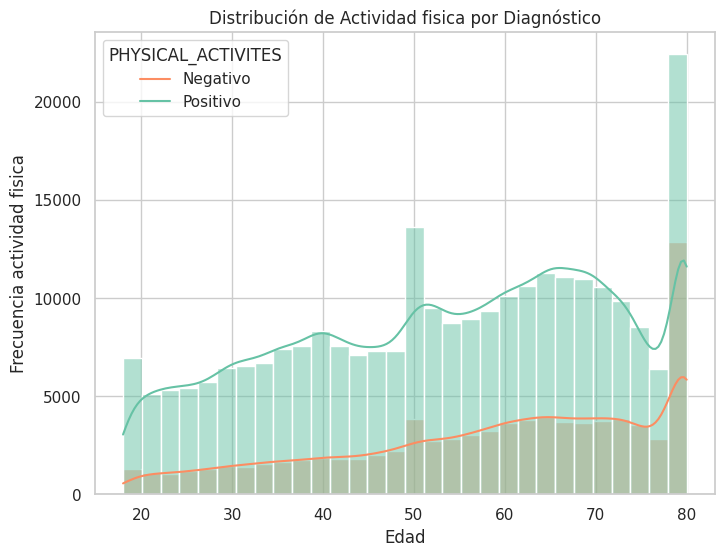

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='AGE', hue='PHYSICAL_ACTIVITIES', kde=True, palette='Set2', bins=30)
plt.title("Distribución de Actividad fisica por Diagnóstico")
plt.xlabel("Edad")
plt.ylabel("Frecuencia actividad fisica")
plt.legend(title="PHYSICAL_ACTIVITES", labels=["Negativo", "Positivo"])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

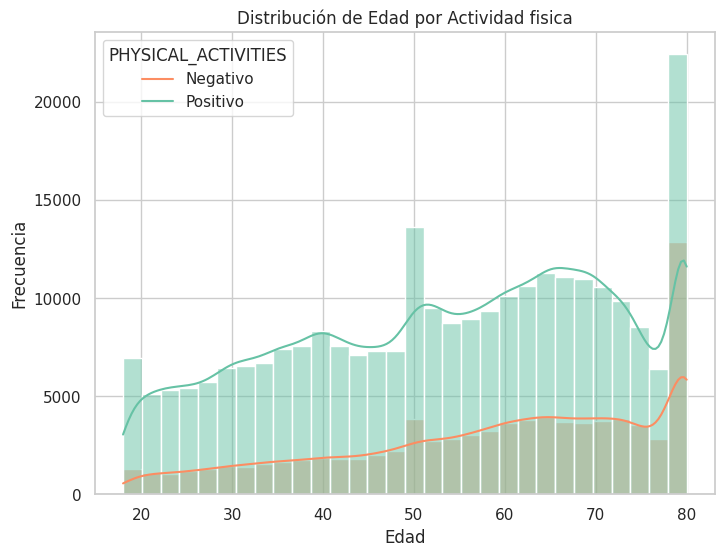

In [18]:
df['PHYSICAL_ACTIVITIES_Label'] = df['PHYSICAL_ACTIVITIES'].map({1: 'Negativo', 2: 'Positivo'})

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='AGE', hue='PHYSICAL_ACTIVITIES_Label', kde=True, palette='Set2', bins=30)
plt.title("Distribución de Edad por Actividad fisica")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend(title="PHYSICAL_ACTIVITIES",labels=["Negativo", "Positivo"])
plt.show()

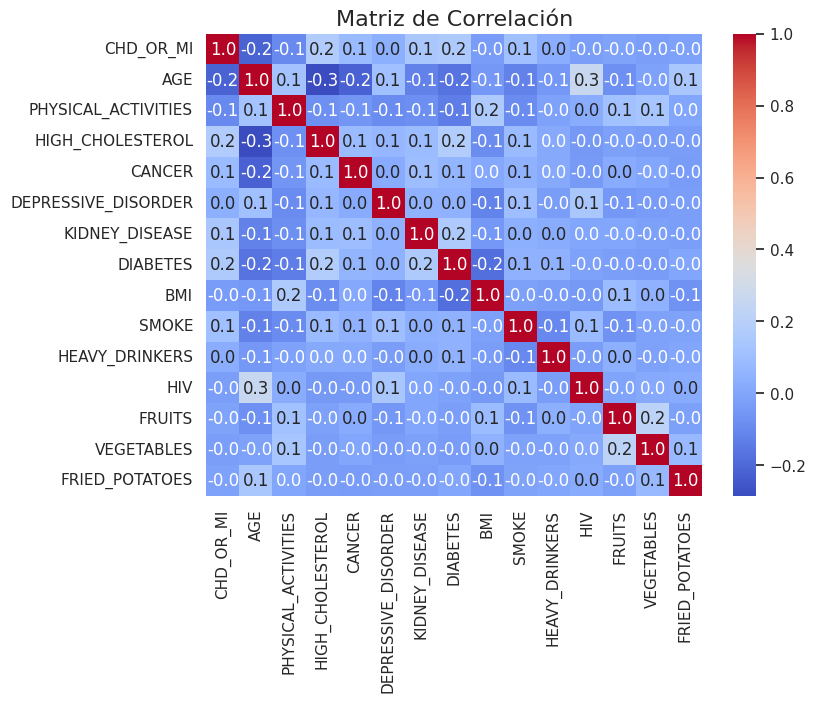

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes para la correlación
columns_to_analyze = ['CHD_OR_MI', 'AGE',
       'PHYSICAL_ACTIVITIES', 'HIGH_CHOLESTEROL', 'CANCER', 'DEPRESSIVE_DISORDER',
       'KIDNEY_DISEASE', 'DIABETES', 'BMI',
       'SMOKE', 'HEAVY_DRINKERS', 'HIV',
       'FRUITS', 'VEGETABLES', 'FRIED_POTATOES']
filtered_df = df[columns_to_analyze].dropna()

# Calcular la matriz de correlación
correlation_matrix = filtered_df.corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", cbar=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()


Observaciones iniciales:
- En el primer cuartil existe el mayor rango de poblacion de 18 a 40
- El ultimo cuartil tiene el menor rango de poblacion de 69  a 80
- Alta proporcion de pacientes con enfermedad coronaria, 92% del total
- Bastantes valores NAN, se realizara una imputación de los datos de acuerdo a la correlación que tengan entre caracteristicas
- Normalizar y escalar AGE, BMI puesto que son numericas
- Convertir los categoricos a numericos SEX y ETHNICITY (one hot encoding)
- Se usara heatmap para identificar las columnas mas relevantes y tambien las menos relevantes


In [20]:
numberRegisterBefore= len(df)


df_cleaned = df[df.isnull().sum(axis=1) <= 2]

# Mostrar el DataFrame después de la limpieza
print(f"\nDataFrame después de eliminar registros con más de 2 NaN:{len(df_cleaned)}")
df = df_cleaned


numberRegisterAfter = len(df)
print(f"Se han perdido {numberRegisterBefore- numberRegisterAfter} registros")


DataFrame después de eliminar registros con más de 2 NaN:307505
Se han perdido 39741 registros


In [21]:
df = df.drop(columns=['CHD_OR_MI_Label','PHYSICAL_ACTIVITIES_Label'])

In [22]:
# Selecciona columnas que deberían ser numéricas
numeric_columns = df.select_dtypes(include=['number'])

# Verifica si hay valores no numéricos en las columnas numéricas
for column in numeric_columns.columns:
    non_numeric_values = df[~df[column].apply(pd.to_numeric, errors='coerce').notna()]
    if not non_numeric_values.empty:
        print(f"Columna '{column}' contiene valores no numéricos:")
        print(f"{len(non_numeric_values[column])}")


Columna 'HEALTH' contiene valores no numéricos:
381
Columna 'PHYSICAL_HEALTH' contiene valores no numéricos:
4298
Columna 'MENTAL_HEALTH' contiene valores no numéricos:
3284
Columna 'PHYSICAL_ACTIVITIES' contiene valores no numéricos:
171
Columna 'BLOOD_PRESSURE' contiene valores no numéricos:
650
Columna 'HIGH_CHOLESTEROL' contiene valores no numéricos:
40067
Columna 'SKIN_CANCER' contiene valores no numéricos:
583
Columna 'CANCER' contiene valores no numéricos:
513
Columna 'BRONCHITIS' contiene valores no numéricos:
825
Columna 'DEPRESSIVE_DISORDER' contiene valores no numéricos:
1027
Columna 'KIDNEY_DISEASE' contiene valores no numéricos:
762
Columna 'DIABETES' contiene valores no numéricos:
265
Columna 'ARTHRITIS' contiene valores no numéricos:
1254
Columna 'BMI' contiene valores no numéricos:
19400
Columna 'DIFFICULTY_WALKING' contiene valores no numéricos:
681
Columna 'SMOKE' contiene valores no numéricos:
1405
Columna 'TABACCO_PRODUCTS' contiene valores no numéricos:
154
Columna

 Existe una asociación estadísticamente significativa entre PHYSICAL_HEALTH y CHD_OR_MI

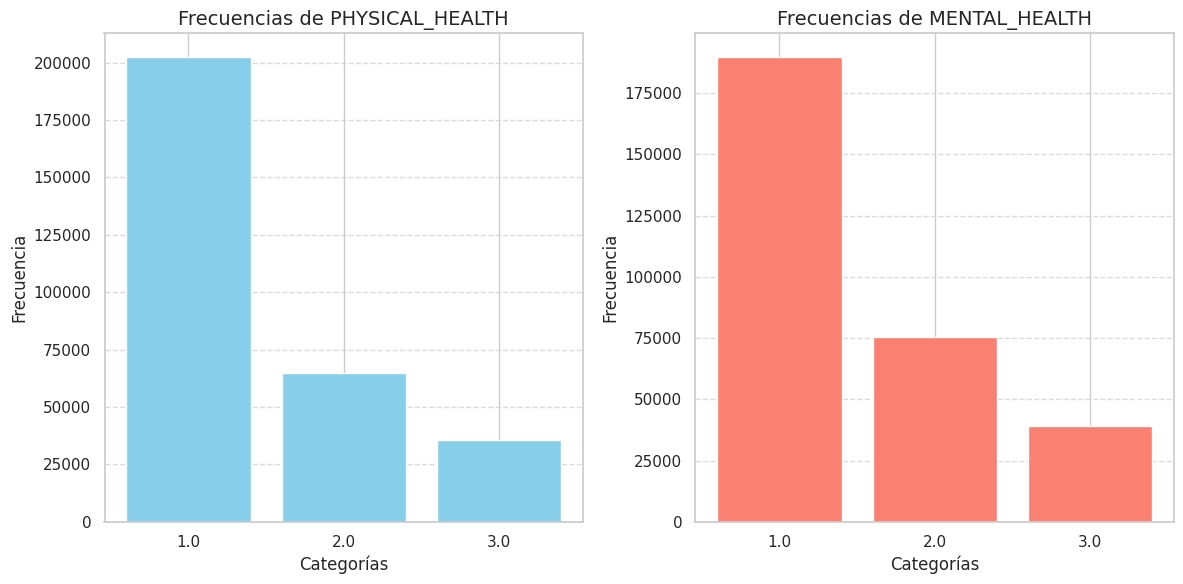

In [23]:
import matplotlib.pyplot as plt

# Crear gráficos de barras para PHYSICAL_HEALTH y MENTAL_HEALTH
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Diagrama de frecuencias para PHYSICAL_HEALTH
physical_counts = df['PHYSICAL_HEALTH'].value_counts()
axes[0].bar(physical_counts.index.astype(str), physical_counts.values, color='skyblue')
axes[0].set_title('Frecuencias de PHYSICAL_HEALTH', fontsize=14)
axes[0].set_xlabel('Categorías', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Diagrama de frecuencias para MENTAL_HEALTH
mental_counts = df['MENTAL_HEALTH'].value_counts()
axes[1].bar(mental_counts.index.astype(str), mental_counts.values, color='salmon')
axes[1].set_title('Frecuencias de MENTAL_HEALTH', fontsize=14)
axes[1].set_xlabel('Categorías', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar diseño
plt.tight_layout()
plt.show()


**Imputación de datos faltantes**

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer



class ImputationbyRegression:
    def __init__(self,df, FEATURES,TARGET,modelName="LogisticRegression"): #TARGET = 'MENTAL_HEALTH' # FEATURES = ['HEALTH', 'PHYSICAL_HEALTH', 'PHYSICAL_ACTIVITIES']
        self.df = df
        self.TARGET = TARGET
        self.FEATURES = FEATURES
        self.train_df = df.dropna(subset=[TARGET])  # Filtrar las filas donde DIFFICULTY_WALKING no es NaN
        self.test_df =df[df[TARGET].isna()]  # Filtrar las filas donde DIFFICULTY_WALKING es NaN 
        models = {"LogisticRegression":LogisticRegression(max_iter=1000), "LinearRegression":LinearRegression()}
        
        self.model = models[modelName]
        self.modelName = modelName
        
    
        """print("\nEntrenamiento:") 
        print(self.train_df.head())
        
        print("\nDataFrame de prueba (con valores faltantes en DIFFICULTY_WALKING):")
        print(self.test_df.head())"""

    def train(self):
        
        # Imputar los valores faltantes en las características (X) usando la media
        if self.train_df[self.FEATURES].isnull().all(axis=0).any():
            raise ValueError("Some features have all missing values.")

        imputer = SimpleImputer(strategy='mean')
        X_train_imputed = imputer.fit_transform(self.train_df[self.FEATURES])
        X_test_imputed = imputer.transform(self.test_df[self.FEATURES])
        
        # Definir la variable objetivo (y) en el conjunto de entrenamiento
        y_train = self.train_df[self.TARGET]
        
        
        # Entrenar el modelo
        self.model.fit(X_train_imputed, y_train)
        # Mostrar la precisión del modelo en los datos de entrenamiento
        y_train_pred = self.model.predict(X_train_imputed)
        if(self.modelName == "LogisticRegression"):
            print("\nPrecisión en el conjunto de entrenamiento:", accuracy_score(y_train, y_train_pred))
        if(self.modelName == "LinearRegression"):
            mse = mean_squared_error(y_train, y_train_pred)
            print("\nError cuadrático medio (MSE) en el conjunto de entrenamiento:", mse)

        # Predecir los valores faltantes en el conjunto de prueba
        self.predicciones = self.model.predict(X_test_imputed)
        

    def imputation(self):
        
        # Asignar las predicciones a los valores faltantes en DIFFICULTY_WALKING
        self.df.loc[df[self.TARGET].isna(), self.TARGET] = self.predicciones
        
        # Mostrar el dataframe con los valores imputados
        """print("\nDataFrame después de la imputación:")
        print(df)"""



In [25]:
FEATURES = ['HEALTH', 'PHYSICAL_HEALTH', 'PHYSICAL_ACTIVITIES','AGE','DEPRESSIVE_DISORDER']
TARGET = 'MENTAL_HEALTH'
imputation_df = ImputationbyRegression(df,FEATURES, TARGET)
imputation_df.train()
imputation_df.imputation()


Precisión en el conjunto de entrenamiento: 0.6756404061521065


In [26]:
FEATURES = ['PHYSICAL_ACTIVITIES','AGE','FRUITS','VEGETABLES']
TARGET = 'PHYSICAL_HEALTH'
imputation_df = ImputationbyRegression(df,FEATURES, TARGET)
imputation_df.train()
imputation_df.imputation()


Precisión en el conjunto de entrenamiento: 0.668107926268193


In [27]:
FEATURES = ['AGE','CHD_OR_MI','DIABETES','BMI','PHYSICAL_ACTIVITIES']
TARGET = 'HIGH_CHOLESTEROL'
imputation_df = ImputationbyRegression(df,FEATURES, TARGET)
imputation_df.train()
imputation_df.imputation()


Precisión en el conjunto de entrenamiento: 0.6383834757962593


El error cuadratico medio indica que existen outliners

In [28]:
FEATURES = ['AGE','PHYSICAL_ACTIVITIES','FRIED_POTATOES','FRUITS','HIGH_CHOLESTEROL','DEPRESSIVE_DISORDER','DIABETES']
TARGET = 'BMI'
imputation_df = ImputationbyRegression(df,FEATURES, TARGET,modelName = "LinearRegression")
imputation_df.train()
imputation_df.imputation()


Error cuadrático medio (MSE) en el conjunto de entrenamiento: 396185.8232251678


In [29]:
FEATURES = ['AGE','SMOKE','DEPRESSIVE_DISORDER']
TARGET = 'HIV'
imputation_df = ImputationbyRegression(df,FEATURES, TARGET)
imputation_df.train()
imputation_df.imputation()


Precisión en el conjunto de entrenamiento: 0.6771001009467165


In [30]:
FEATURES = ['AGE','DIABETES','SMOKE']
TARGET='HEAVY_DRINKERS' 
imputation_df = ImputationbyRegression(df,FEATURES, TARGET)
imputation_df.train()
imputation_df.imputation()


Precisión en el conjunto de entrenamiento: 0.940376935010067


In [31]:
import pandas as pd

columns_to_impute = ['FRUITS', 'VEGETABLES']

# Imputar valores faltantes con la moda para las columnas específicas
for col in columns_to_impute:
    mode_value = df[col].mode()[0]  # Obtener la moda de la columna
    df[col].fillna(mode_value, inplace=True)  # Rellenar los valores faltantes con la moda

# Mostrar el DataFrame después de la imputación
print("DataFrame después de la imputación por moda en las columnas especificadas:")
print(df[columns_to_impute])


DataFrame después de la imputación por moda en las columnas especificadas:
        FRUITS  VEGETABLES
0          2.0         1.0
2          2.0         1.0
3          1.0         2.0
4          1.0         1.0
5          2.0         2.0
...        ...         ...
347240     1.0         1.0
347241     1.0         1.0
347242     2.0         1.0
347243     2.0         1.0
347245     2.0         1.0

[307505 rows x 2 columns]


/tmp/ipykernel_17/605269634.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)  # Rellenar los valores faltantes con la moda


In [32]:
df.describe()

,CHD_OR_MI,SEX,AGE,HEALTH,PHYSICAL_HEALTH,MENTAL_HEALTH,PHYSICAL_ACTIVITIES,BLOOD_PRESSURE,HIGH_CHOLESTEROL,SKIN_CANCER,...,DIFFICULTY_WALKING,SMOKE,TABACCO_PRODUCTS,E_CIGARETTES,HEAVY_DRINKERS,HIV,FRUITS,VEGETABLES,FRIED_POTATOES,ETHNICITY
count,307505.000000,307505.000000,307505.000000,307124.000000,307505.000000,307505.000000,307334.000000,306855.000000,307505.000000,306922.000000,...,306824.000000,306100.000000,307351.000000,307272.000000,307505.000000,307505.000000,307505.000000,307505.000000,305217.000000,307505.000000
mean,0.917819,1.536931,54.777851,1.162146,1.443203,1.502076,1.237637,1.395304,1.637349,1.904331,...,1.842604,1.596135,2.950366,3.135802,1.058744,1.675690,1.375604,1.178290,1.683491,1.689072
std,0.274640,0.498635,17.485991,0.368586,0.691863,0.711227,0.425636,0.488917,0.480766,0.294138,...,0.364175,0.490672,0.289886,0.544439,0.235145,0.468117,0.484279,0.382757,0.709618,1.446019
min,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
75%,1.000000,2.000000,69.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
max,1.000000,2.000000,80.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,6.000000


In [33]:
numberRegisterBefore= len(df)
df = df.dropna(subset=['HEALTH'])
df = df.dropna(subset=['PHYSICAL_ACTIVITIES'])
df = df.dropna(subset=['BLOOD_PRESSURE'])
df = df.dropna(subset=['SKIN_CANCER'])
df = df.dropna(subset=['CANCER'])
df = df.dropna(subset=['BRONCHITIS'])
df = df.dropna(subset=['DEPRESSIVE_DISORDER'])
df = df.dropna(subset=['KIDNEY_DISEASE'])
df = df.dropna(subset=['DIABETES'])
df = df.dropna(subset=['ARTHRITIS'])
df = df.dropna(subset=['DIFFICULTY_WALKING'])
df = df.dropna(subset=['TABACCO_PRODUCTS'])
df = df.dropna(subset=['E_CIGARETTES'])
df = df.dropna(subset=['FRIED_POTATOES'])
df = df.dropna(subset=['SMOKE'])
numberRegisterAfter = len(df)
print(f"Se han perdido {numberRegisterBefore- numberRegisterAfter} registros")


Se han perdido 10873 registros


In [34]:
nan_count_per_column = df.isnull().sum()
print(nan_count_per_column)
df["BMI"].describe()
df.describe()

CHD_OR_MI              0
SEX                    0
AGE                    0
HEALTH                 0
PHYSICAL_HEALTH        0
MENTAL_HEALTH          0
PHYSICAL_ACTIVITIES    0
BLOOD_PRESSURE         0
HIGH_CHOLESTEROL       0
SKIN_CANCER            0
CANCER                 0
BRONCHITIS             0
DEPRESSIVE_DISORDER    0
KIDNEY_DISEASE         0
DIABETES               0
ARTHRITIS              0
BMI                    0
DIFFICULTY_WALKING     0
SMOKE                  0
TABACCO_PRODUCTS       0
E_CIGARETTES           0
HEAVY_DRINKERS         0
HIV                    0
FRUITS                 0
VEGETABLES             0
FRIED_POTATOES         0
ETHNICITY              0
ID                     0
dtype: int64


,CHD_OR_MI,SEX,AGE,HEALTH,PHYSICAL_HEALTH,MENTAL_HEALTH,PHYSICAL_ACTIVITIES,BLOOD_PRESSURE,HIGH_CHOLESTEROL,SKIN_CANCER,...,DIFFICULTY_WALKING,SMOKE,TABACCO_PRODUCTS,E_CIGARETTES,HEAVY_DRINKERS,HIV,FRUITS,VEGETABLES,FRIED_POTATOES,ETHNICITY
count,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,...,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000
mean,0.919240,1.537198,54.648426,1.158799,1.437404,1.499083,1.235413,1.392692,1.639435,1.904565,...,1.845630,1.597781,2.950447,3.135808,1.059002,1.675999,1.375260,1.178885,1.682013,1.687205
std,0.272467,0.498615,17.475677,0.365490,0.687616,0.708631,0.424257,0.488350,0.480165,0.293815,...,0.361303,0.490346,0.289697,0.543821,0.235630,0.468001,0.484191,0.383257,0.708824,1.444077
min,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
75%,1.000000,2.000000,69.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
max,1.000000,2.000000,80.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,6.000000


In [35]:
df.describe()

,CHD_OR_MI,SEX,AGE,HEALTH,PHYSICAL_HEALTH,MENTAL_HEALTH,PHYSICAL_ACTIVITIES,BLOOD_PRESSURE,HIGH_CHOLESTEROL,SKIN_CANCER,...,DIFFICULTY_WALKING,SMOKE,TABACCO_PRODUCTS,E_CIGARETTES,HEAVY_DRINKERS,HIV,FRUITS,VEGETABLES,FRIED_POTATOES,ETHNICITY
count,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,...,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000,296632.000000
mean,0.919240,1.537198,54.648426,1.158799,1.437404,1.499083,1.235413,1.392692,1.639435,1.904565,...,1.845630,1.597781,2.950447,3.135808,1.059002,1.675999,1.375260,1.178885,1.682013,1.687205
std,0.272467,0.498615,17.475677,0.365490,0.687616,0.708631,0.424257,0.488350,0.480165,0.293815,...,0.361303,0.490346,0.289697,0.543821,0.235630,0.468001,0.484191,0.383257,0.708824,1.444077
min,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
75%,1.000000,2.000000,69.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
max,1.000000,2.000000,80.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,6.000000


**Entrenamiento**

In [36]:

FEATURES = ['SEX', 'AGE', 'HEALTH', 'PHYSICAL_HEALTH', 'MENTAL_HEALTH',
       'PHYSICAL_ACTIVITIES', 'BLOOD_PRESSURE', 'HIGH_CHOLESTEROL',
       'SKIN_CANCER', 'CANCER', 'BRONCHITIS', 'DEPRESSIVE_DISORDER',
       'KIDNEY_DISEASE', 'DIABETES', 'ARTHRITIS', 'BMI', 'DIFFICULTY_WALKING',
       'SMOKE', 'TABACCO_PRODUCTS', 'E_CIGARETTES', 'HEAVY_DRINKERS', 'HIV',
       'FRUITS', 'VEGETABLES', 'FRIED_POTATOES', 'ETHNICITY']
TARGET = 'CHD_OR_MI'


In [37]:
df_evaluation_public = pd.read_csv("/kaggle/input/prediccion-de-sufrir-enfermedades-coronarias/test_public.csv")
df_evaluation_public = df_evaluation_public.dropna()
X_evaluation_public = df_evaluation_public[FEATURES].values
y_evaluation_public = df_evaluation_public[TARGET].values
df_evaluation_public.describe()



,CHD_OR_MI,SEX,AGE,HEALTH,PHYSICAL_HEALTH,MENTAL_HEALTH,PHYSICAL_ACTIVITIES,BLOOD_PRESSURE,HIGH_CHOLESTEROL,SKIN_CANCER,...,DIFFICULTY_WALKING,SMOKE,TABACCO_PRODUCTS,E_CIGARETTES,HEAVY_DRINKERS,HIV,FRUITS,VEGETABLES,FRIED_POTATOES,ETHNICITY
count,26612.000000,26612.000000,26612.000000,26612.000000,26612.000000,26612.000000,26612.000000,26612.000000,26612.000000,26612.000000,...,26612.000000,26612.000000,26612.000000,26612.000000,26612.000000,26612.000000,26612.00000,26612.000000,26612.000000,26612.000000
mean,0.916241,1.533444,56.478130,1.150083,1.441981,1.482715,1.219337,1.414963,1.602473,1.895348,...,1.846798,1.595107,2.950173,3.148354,1.060236,1.663949,1.37577,1.173643,1.702916,1.663460
std,0.277032,0.498890,16.379745,0.357159,0.689290,0.696924,0.413805,0.492725,0.489396,0.306110,...,0.360188,0.490880,0.291934,0.520458,0.237928,0.472366,0.48433,0.378810,0.711656,1.421105
min,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,59.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,1.00000,1.000000,2.000000,1.000000
75%,1.000000,2.000000,70.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.00000,1.000000,2.000000,1.000000
max,1.000000,2.000000,80.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,2.00000,2.000000,3.000000,6.000000


In [38]:
df_evaluation_private = pd.read_csv("/kaggle/input/prediccion-de-sufrir-enfermedades-coronarias/test_private.csv")
df_evaluation_private = df_evaluation_private.dropna()
df_evaluation_private

,SEX,AGE,HEALTH,PHYSICAL_HEALTH,MENTAL_HEALTH,PHYSICAL_ACTIVITIES,BLOOD_PRESSURE,HIGH_CHOLESTEROL,SKIN_CANCER,CANCER,...,SMOKE,TABACCO_PRODUCTS,E_CIGARETTES,HEAVY_DRINKERS,HIV,FRUITS,VEGETABLES,FRIED_POTATOES,ETHNICITY,ID
0,2,56,2.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,...,1.0,3.0,3.0,1.0,1.0,2.0,2.0,2.0,1,PID2022_152435
1,2,59,1.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,3.0,4.0,1.0,2.0,2.0,2.0,1.0,1,PID2022_299594
4,2,43,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1,PID2022_317306
5,2,34,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,3.0,3.0,2.0,2.0,1.0,1.0,2.0,1,PID2022_389302
6,2,64,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,3.0,3.0,1.0,2.0,2.0,1.0,3.0,1,PID2022_187691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43397,2,64,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,2.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,1,PID2022_367949
43398,2,80,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,...,2.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,1,PID2022_218259
43401,2,63,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,1.0,3.0,3.0,2.0,2.0,1.0,1.0,3.0,1,PID2022_405631
43402,1,69,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,1.0,3.0,3.0,1.0,2.0,1.0,1.0,1.0,1,PID2022_264185


In [39]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
clfs = []

scores_auc = []
scores_f1 = []

X = df[FEATURES].values
y = (df[TARGET].values)

# Estandarización de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

losses_train = []
losses_val = []

kf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled, y=y), start=1):
    # Dividir datos en entrenamiento y validación
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = CatBoostClassifier(iterations=250, loss_function="Logloss")
    clf.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

    losses_train.append(clf.get_evals_result()['learn']['Logloss'])
    losses_val.append(clf.get_evals_result()['validation']['Logloss'])
    
    preds_proba = clf.predict_proba(X_test)[:, 1]
    clfs.append(clf)
    preds_binary = (preds_proba >= 0.5).astype(int)
    
    # Calcular métricas
    auc = roc_auc_score(y_test, preds_proba)
    f1 = f1_score(y_test, preds_binary)
    scores_auc.append(auc)
    scores_f1.append(f1)
print(f'Mean AUC across all folds: {np.mean(scores_auc)}')
print(f'Mean F1-score across all folds: {np.mean(scores_f1)}')

Mean AUC across all folds: 0.8478943480608597
Mean F1-score across all folds: 0.9583668771510945


**Comprobación del modelo**

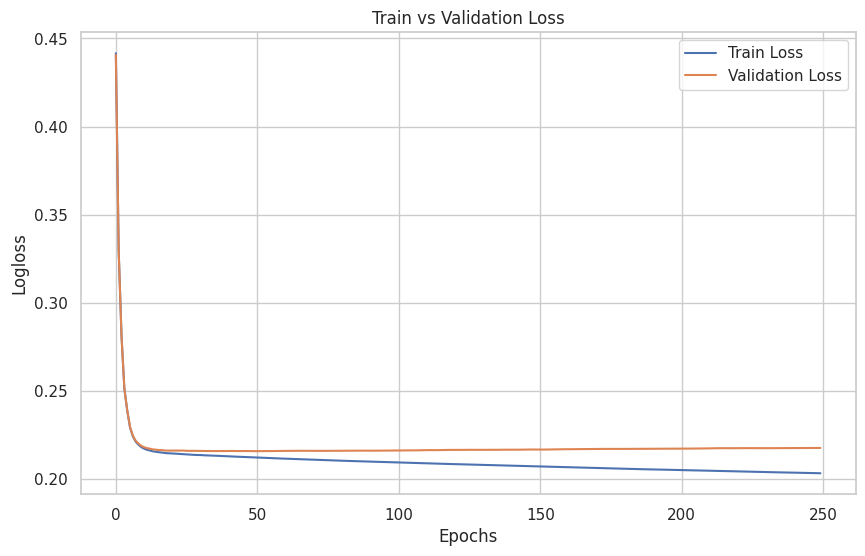

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(losses_train[0], label="Train Loss")
plt.plot(losses_val[0], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Logloss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()

Se puede ver el mismo comportamiento en train y validación con ligero desplazamiento hacia abajo de train, se puede decir que el entrenamiento es por el momento bueno

**Predicciones**

In [41]:
df_evaluation_private = pd.read_csv("/kaggle/input/prediccion-de-sufrir-enfermedades-coronarias/test_private.csv")
#df_evaluation_private = df_evaluation_private.dropna()

In [42]:

X_new = df_evaluation_private[FEATURES].values

scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Promediar las predicciones de todos los clasificadores entrenados
predictions = np.zeros(X_new_scaled.shape[0])  # Inicializar array de predicciones

for clf in clfs:
    # Obtener predicciones de probabilidad para cada clasificador
    preds = clf.predict_proba(X_new_scaled)[:, 1]
    predictions += preds

# Promedio de las predicciones
predictions /= len(clfs)


print("Predicciones finales:")
print(predictions)

# Si necesitas una clasificación binaria en lugar de probabilidades
binary_predictions = (predictions >= 0.5).astype(int)
print("Clasificación binaria:")
print(binary_predictions)

df_evaluation_private["CHD_OR_MI"] = binary_predictions  # Crear DataFrame con las predicciones
df_evaluation_private = df_evaluation_private[["ID", "CHD_OR_MI"]]
#df_evaluation_private = df_evaluation_private.rename(columns={"CHD_OR_MI": "private_CHD_OR_MI"})
#df_evaluation_private = df_evaluation_private.rename(columns={"ID": "private_ID"})



Predicciones finales:
[0.773553   0.97085967 0.99606946 ... 0.81686901 0.83771214 0.79970798]
Clasificación binaria:
[1 1 1 ... 1 1 1]


In [43]:
df_evaluation_public = pd.read_csv("/kaggle/input/prediccion-de-sufrir-enfermedades-coronarias/test_public.csv")
#df_evaluation_public = df_evaluation_public.dropna()

In [44]:

X_new = df_evaluation_public[FEATURES].values


scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Promediar las predicciones de todos los clasificadores entrenados
predictions = np.zeros(X_new_scaled.shape[0])  # Inicializar array de predicciones

for clf in clfs:
    # Obtener predicciones de probabilidad para cada clasificador
    preds = clf.predict_proba(X_new_scaled)[:, 1]
    predictions += preds

# Promedio de las predicciones
predictions /= len(clfs)


print("Predicciones finales:")
print(predictions)

# Si necesitas una clasificación binaria en lugar de probabilidades
binary_predictions = (predictions >= 0.5).astype(int)
print("Clasificación binaria:")
print(binary_predictions)

df_evaluation_public["CHD_OR_MI"] = binary_predictions  # Crear DataFrame con las predicciones
df_evaluation_public = df_evaluation_public[["ID", "CHD_OR_MI"]]
#df_evaluation_public = df_evaluation_public.rename(columns={"CHD_OR_MI": "public_CHD_OR_MI"})
#df_evaluation_public = df_evaluation_public.rename(columns={"ID": "public_ID"})



Predicciones finales:
[0.92502338 0.98423651 0.87759476 ... 0.84787207 0.98891019 0.98666594]
Clasificación binaria:
[1 1 1 ... 1 1 1]


In [45]:
print(len(df_evaluation_public))
print(len(df_evaluation_private))

43406
43406


In [46]:
result = pd.concat([df_evaluation_public, df_evaluation_private],  ignore_index=True)
print(result)

                   ID  CHD_OR_MI
0      PID2022_100531          1
1      PID2022_043184          1
2      PID2022_071971          1
3      PID2022_070778          1
4      PID2022_082363          1
...               ...        ...
86807  PID2022_405631          1
86808  PID2022_264185          1
86809  PID2022_019640          1
86810  PID2022_073050          1
86811  PID2022_085464          1

[86812 rows x 2 columns]


In [47]:
result.to_csv("resultados.csv", index=False)

array([[<Axes: title={'center': 'CHD_OR_MI'}>]], dtype=object)

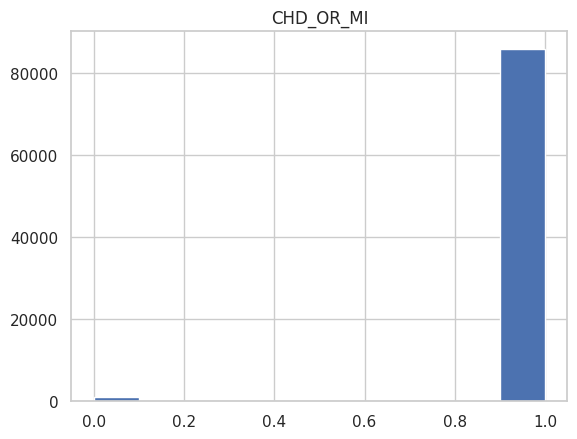

In [48]:
result.hist()

In [49]:
result[result["CHD_OR_MI"]<1]

,ID,CHD_OR_MI
79,PID2022_092850,0
213,PID2022_204739,0
404,PID2022_074999,0
457,PID2022_122469,0
461,PID2022_302073,0
...,...,...
86356,PID2022_274358,0
86462,PID2022_036947,0
86544,PID2022_305443,0
86728,PID2022_159045,0
